In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

### Годы, за которые требуется создать отчет ###

In [3]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
#years = [2022]

### Получение первых и последних вхождений, а также агрегация признаков ###

In [ ]:
for year in years:
  # Скачиваем данные за требуемый год
  if not(os.path.exists("/content/" + str(year))):
    for q in range(1, 5):
      s = "data_Q" + str(q) + "_" + str(year) + ".zip"
      os.system("wget https://f001.backblazeb2.com/file/Backblaze-Hard-Drive-Data/" + s)
      os.system("unzip " + s + " -d /content/" + str(year))
      os.system("rm " + s)

  # Создаем отсортированный по датам список файлов для объединения
  dir = str(year)
  joined_list = []
  if (os.path.isdir(dir)):
      for file in tqdm(os.listdir(dir)):
          if file.endswith('.csv'):
              joined_list.append(os.path.join(dir , file))
  joined_list.sort(key=lambda date: datetime.strptime(date[5:-4], "%Y-%m-%d"))

  # Создаем датафреймы только для первого года
  if year == years[0]:
    first_occurrences = pd.read_csv(joined_list[0])
    last_occurrences = pd.read_csv(joined_list[0])
    not_nan_occurrences = pd.read_csv(joined_list[0])
    not_nan_occurrences['event_flag'] = not_nan_occurrences['failure']

  # Проходимся по списку
  for date in tqdm(joined_list[1:]):
    df = pd.read_csv(date)
    first_occurrences = pd.concat([first_occurrences, df]).drop_duplicates(subset = 'serial_number', keep = 'first')
    last_occurrences = pd.concat([last_occurrences, df]).drop_duplicates(subset = 'serial_number', keep = 'last')
    not_nan_occurrences = not_nan_occurrences.set_index('serial_number').combine_first(df.set_index('serial_number'))

    not_nan_occurrences['event_flag'].fillna(0, inplace=True)
    not_nan_occurrences.loc[df['serial_number'].values, 'event_flag'] = not_nan_occurrences.loc[df['serial_number'].values, 'event_flag'] + df.set_index('serial_number')['failure']
    not_nan_occurrences = not_nan_occurrences.reset_index()
  # Удаляем данные за год
  os.system("rm  -rf " + str(year))

100%|██████████| 5/5 [00:00<00:00, 24385.49it/s]
0it [00:00, ?it/s]


In [ ]:
last_occurrences.shape, first_occurrences.shape, not_nan_occurrences.shape

In [ ]:
last_occurrences['serial_number'].unique().shape, first_occurrences['serial_number'].unique().shape, not_nan_occurrences['serial_number'].unique().shape

((292836,), (292836,), (292836,))

In [ ]:
first_occurrences = first_occurrences.sort_values(by='serial_number').reset_index(drop=True)
last_occurrences = last_occurrences.sort_values(by='serial_number').reset_index(drop=True)
not_nan_occurrences = not_nan_occurrences.sort_values(by='serial_number').reset_index(drop=True)

In [ ]:
first_occurrences['date'][first_occurrences['date'].str.contains(r"/")] = pd.to_datetime(first_occurrences['date'][first_occurrences['date'].str.contains(r"/")], format="%m/%d/%y")
last_occurrences['date'][last_occurrences['date'].str.contains(r"/")] = pd.to_datetime(last_occurrences['date'][last_occurrences['date'].str.contains(r"/")], format="%m/%d/%y")
not_nan_occurrences['date'][not_nan_occurrences['date'].str.contains(r"/")] = pd.to_datetime(not_nan_occurrences['date'][not_nan_occurrences['date'].str.contains(r"/")], format="%m/%d/%y")

<ipython-input-9-d5add6c9e290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_occurrences['date'][first_occurrences['date'].str.contains(r"/")] = pd.to_datetime(first_occurrences['date'][first_occurrences['date'].str.contains(r"/")], format="%m/%d/%y")
<ipython-input-9-d5add6c9e290>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_occurrences['date'][last_occurrences['date'].str.contains(r"/")] = pd.to_datetime(last_occurrences['date'][last_occurrences['date'].str.contains(r"/")], format="%m/%d/%y")
<ipython-input-9-d5add6c9e290>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
first_occurrences['date'] = pd.to_datetime(first_occurrences['date'], format="%Y/%m/%d")
last_occurrences['date'] = pd.to_datetime(last_occurrences['date'], format="%Y/%m/%d")
not_nan_occurrences['date'] = pd.to_datetime(not_nan_occurrences['date'], format="%Y/%m/%d")

### Сохранение в файлы ###


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# first_occurrences.to_csv(r"/content/drive/MyDrive/Survival analysis/datasets_review/backblaze/part_2/first_occ.csv")
# last_occurrences.to_csv(r"/content/drive/MyDrive/Survival analysis/datasets_review/backblaze/part_2/last_occ.csv")
# not_nan_occurrences.to_csv(r"/content/drive/MyDrive/Survival analysis/datasets_review/backblaze/part_2/not_nan_occ.csv")

In [ ]:
first_occ = pd.read_csv(r"/content/drive/MyDrive/Survival analysis/datasets_review/backblaze/part_2/first_occ.csv")
last_occ = pd.read_csv(r"/content/drive/MyDrive/Survival analysis/datasets_review/backblaze/part_2/last_occ.csv")
nn_occ = pd.read_csv(r"/content/drive/MyDrive/Survival analysis/datasets_review/backblaze/part_2/not_nan_occ.csv")

In [ ]:
first_occ['date'] = pd.to_datetime(first_occ['date'], format="%Y/%m/%d")
last_occ['date'] = pd.to_datetime(last_occ['date'], format="%Y/%m/%d")
nn_occ['date'] = pd.to_datetime(nn_occ['date'], format="%Y/%m/%d")

In [ ]:
first_occ

Unnamed: 0       date     serial_number        model  capacity_bytes  \
0                0 2021-06-02  02308a3415be0010  DELLBOSS VD    4.800368e+11   
1                1 2021-07-22  043d3be09f4a0010  DELLBOSS VD    4.800368e+11   
2                2 2021-11-19  04a81d26aebf0010  DELLBOSS VD    4.800368e+11   
3                3 2020-04-23  0564f6f3fab90010  DELLBOSS VD    4.800368e+11   
4                4 2021-06-02  07590fcc256e0010  DELLBOSS VD    4.800368e+11   
...            ...        ...               ...          ...             ...   
292831      292831 2021-07-22  fa1541a893830010  DELLBOSS VD    4.800368e+11   
292832      292832 2021-11-19  fe3fb38ae9410010  DELLBOSS VD    4.800368e+11   
292833      292833 2021-07-22  fe61a3fcef110010  DELLBOSS VD    4.800368e+11   
292834      292834 2020-12-31  fe78b975bfab0010  DELLBOSS VD    4.800368e+11   
292835      292835 2017-04-12               NaN       00MD00    4.000787e+12   

        failure  smart_1_normalized  smart_1_raw  smart_2_normalized  \
0             0                 NaN          NaN                 NaN   
1             0                 NaN          NaN                 NaN   
2             0                 NaN          NaN                 NaN   
3             0                 NaN          NaN                 NaN   
4             0                 NaN          NaN                 NaN   
...         ...                 ...          ...                 ...   
292831        0                 NaN          NaN                 NaN   
292832        0                 NaN          NaN                 NaN   
292833        0                 NaN          NaN                 NaN   
292834        0                 NaN          NaN                 NaN   
292835        0               118.0  191927952.0                 NaN   

        smart_2_raw  ...  smart_171_normalized  smart_171_raw  \
0               NaN  ...                   NaN            NaN   
1               NaN  ...                   NaN            NaN   
2               NaN  ...                   NaN            NaN   
3               NaN  ...                   NaN            NaN   
4               NaN  ...                   NaN            NaN   
...             ...  ...                   ...            ...   
292831          NaN  ...                   NaN            NaN   
292832          NaN  ...                   NaN            NaN   
292833          NaN  ...                   NaN            NaN   
292834          NaN  ...                   NaN            NaN   
292835          NaN  ...                   NaN            NaN   

        smart_172_normalized  smart_172_raw  smart_230_normalized  \
0                        NaN            NaN                   NaN   
1                        NaN            NaN                   NaN   
2                        NaN            NaN                   NaN   
3                        NaN            NaN                   NaN   
4                        NaN            NaN                   NaN   
...                      ...            ...                   ...   
292831                   NaN            NaN                   NaN   
292832                   NaN            NaN                   NaN   
292833                   NaN            NaN                   NaN   
292834                   NaN            NaN                   NaN   
292835                   NaN            NaN                   NaN   

        smart_230_raw  smart_244_normalized  smart_244_raw  \
0                 NaN                   NaN            NaN   
1                 NaN                   NaN            NaN   
2                 NaN                   NaN            NaN   
3                 NaN                   NaN            NaN   
4                 NaN                   NaN            NaN   
...               ...                   ...            ...   
292831            NaN                   NaN            NaN   
292832            NaN                   NaN            NaN   
292833        

In [ ]:
s  = first_occ.serial_number.value_counts()

In [ ]:
first_occ[first_occ['date'].dt.year == 2022]

Empty DataFrame
Columns: [Unnamed: 0, date, serial_number, model, capacity_bytes, failure, smart_1_normalized, smart_1_raw, smart_2_normalized, smart_2_raw, smart_3_normalized, smart_3_raw, smart_4_normalized, smart_4_raw, smart_5_normalized, smart_5_raw, smart_7_normalized, smart_7_raw, smart_8_normalized, smart_8_raw, smart_9_normalized, smart_9_raw, smart_10_normalized, smart_10_raw, smart_11_normalized, smart_11_raw, smart_12_normalized, smart_12_raw, smart_13_normalized, smart_13_raw, smart_15_normalized, smart_15_raw, smart_22_normalized, smart_22_raw, smart_183_normalized, smart_183_raw, smart_184_normalized, smart_184_raw, smart_187_normalized, smart_187_raw, smart_188_normalized, smart_188_raw, smart_189_normalized, smart_189_raw, smart_190_normalized, smart_190_raw, smart_191_normalized, smart_191_raw, smart_192_normalized, smart_192_raw, smart_193_normalized, smart_193_raw, smart_194_normalized, smart_194_raw, smart_195_normalized, smart_195_raw, smart_196_normalized, smart_196_raw, smart_197_normalized, smart_197_raw, smart_198_normalized, smart_198_raw, smart_199_normalized, smart_199_raw, smart_200_normalized, smart_200_raw, smart_201_normalized, smart_201_raw, smart_220_normalized, smart_220_raw, smart_222_normalized, smart_222_raw, smart_223_normalized, smart_223_raw, smart_224_normalized, smart_224_raw, smart_225_normalized, smart_225_raw, smart_226_normalized, smart_226_raw, smart_240_normalized, smart_240_raw, smart_241_normalized, smart_241_raw, smart_242_normalized, smart_242_raw, smart_250_normalized, smart_250_raw, smart_251_normalized, smart_251_raw, smart_252_normalized, smart_252_raw, smart_254_normalized, smart_254_raw, smart_255_normalized, smart_255_raw, smart_177_normalized, smart_177_raw, smart_179_normalized, smart_179_raw, ...]
Index: []

[0 rows x 180 columns]

In [ ]:
nn_occ[nn_occ['event_flag']>0]

Unnamed: 0 serial_number  capacity_bytes       date  event_flag  \
885            885  1080A12QF9RG    1.400052e+13 2020-12-01         1.0   
986            986  1090A02QF9RG    1.400052e+13 2020-12-01         1.0   
1001          1001  1090A03MF97G   -1.000000e+00 2020-09-23         1.0   
1087          1087  10A0A034F97G    1.400052e+13 2020-02-20         1.0   
1114          1114  10A0A042F97G    1.400052e+13 2020-02-20         1.0   
...            ...           ...             ...        ...         ...   
290847      290847      ZR50123R    1.800021e+13 2020-09-26         1.0   
290876      290876      ZR501E13    1.800021e+13 2020-09-26         1.0   
290884      290884      ZS5064WT    1.000083e+13 2021-04-07         1.0   
292064      292064      ZTN0A5T2   -1.000000e+00 2021-07-16         1.0   
292140      292140      ZTN0A6FB   -1.000000e+00 2021-08-18         1.0   

        failure                 model  smart_10_normalized  smart_10_raw  \
885           0  TOSHIBA MG07ACA14TEY                100.0           0.0   
986           0  TOSHIBA MG07ACA14TEY                100.0           0.0   
1001          0   TOSHIBA MG07ACA14TA                100.0           0.0   
1087          0   TOSHIBA MG07ACA14TA                100.0           0.0   
1114          0   TOSHIBA MG07ACA14TA                100.0           0.0   
...         ...                   ...                  ...           ...   
290847        0         ST18000NM000J                100.0           0.0   
290876        0         ST18000NM000J                100.0           0.0   
290884        0         ST10000NM001G                100.0           0.0   
292064        0         ST12000NM001G                100.0           0.0   
292140        0         ST12000NM001G                100.0           0.0   

        smart_11_normalized  ...  smart_4_normalized  smart_4_raw  \
885                     NaN  ...               100.0         31.0   
986                     NaN  ...               100.0         31.0   
1001                    NaN  ...               100.0          3.0   
1087                    NaN  ...               100.0          1.0   
1114                    NaN  ...               100.0          1.0   
...                     ...  ...                 ...          ...   
290847                  NaN  ...               100.0          1.0   
290876                  NaN  ...               100.0          1.0   
290884                  NaN  ...               100.0          1.0   
292064                  NaN  ...               100.0          2.0   
292140                  NaN  ...               100.0          2.0   

        smart_5_normalized  smart_5_raw  smart_7_normalized  smart_7_raw  \
885                  100.0          0.0               100.0          0.0   
986                  100.0          0.0               100.0          0.0   
1001                 100.0          0.0               100.0          0.0   
1087                 100.0          0.0               100.0          0.0   
1114                 100.0          0.0               100.0          0.0   
...                    ...          ...                 ...          ...   
290847               100.0          0.0                60.0    1046539.0   
290876               100.0          0.0                61.0    1161529.0   
290884               100.0          0.0               100.0        579.0   
292064               100.0          0.0                72.0   15104069.0   
292140               100.0          0.0                73.0   18328598.0   

        smart_8_normalized  smart_8_raw  smart_9_normalized  smart_9_raw  
885                  100.0          0.0               100.0        184.0  
986                  100.0          0.0               100.0        164.0  
1001                 100.0          0.0               100.0        216.0  
1087                 100.0          0.0               100.0        175.0  
1114                 100.0          0.0               100.0        181.0  
..

In [ ]:
result_dataset[result_dataset['event']>0]

Unnamed: 0       date serial_number                 model  \
885            885 2020-12-01  1080A12QF9RG  TOSHIBA MG07ACA14TEY   
986            986 2020-12-01  1090A02QF9RG  TOSHIBA MG07ACA14TEY   
1001          1001 2020-09-23  1090A03MF97G   TOSHIBA MG07ACA14TA   
1087          1087 2020-02-20  10A0A034F97G   TOSHIBA MG07ACA14TA   
1114          1114 2020-02-20  10A0A042F97G   TOSHIBA MG07ACA14TA   
...            ...        ...           ...                   ...   
290846      290846 2020-12-04      ZR501221         ST18000NM000J   
290847      290847 2020-09-26      ZR50123R         ST18000NM000J   
290876      290876 2020-09-26      ZR501E13         ST18000NM000J   
292064      292064 2021-07-16      ZTN0A5T2         ST12000NM001G   
292140      292140 2021-08-18      ZTN0A6FB         ST12000NM001G   

        capacity_bytes  failure  smart_1_normalized  smart_1_raw  \
885       1.400052e+13        0               100.0          0.0   
986       1.400052e+13        0               100.0          0.0   
1001     -1.000000e+00        0                 NaN          NaN   
1087      1.400052e+13        0               100.0          0.0   
1114      1.400052e+13        0               100.0          0.0   
...                ...      ...                 ...          ...   
290846    1.800021e+13        0                66.0    3732026.0   
290847    1.800021e+13        0                82.0  166827552.0   
290876    1.800021e+13        0                83.0  200910240.0   
292064   -1.000000e+00        0                 NaN          NaN   
292140   -1.000000e+00        0                 NaN          NaN   

        smart_2_normalized  smart_2_raw  ...  smart_172_raw  \
885                  100.0          0.0  ...            NaN   
986                  100.0          0.0  ...            NaN   
1001                   NaN          NaN  ...            NaN   
1087                 100.0          0.0  ...            NaN   
1114                 100.0          0.0  ...            NaN   
...                    ...          ...  ...            ...   
290846                 NaN          NaN  ...            NaN   
290847                 NaN          NaN  ...            NaN   
290876                 NaN          NaN  ...            NaN   
292064                 NaN          NaN  ...            NaN   
292140                 NaN          NaN  ...            NaN   

        smart_230_normalized  smart_230_raw  smart_244_normalized  \
885                      NaN            NaN                   NaN   
986                      NaN            NaN                   NaN   
1001                     NaN            NaN                   NaN   
1087                     NaN            NaN                   NaN   
1114                     NaN            NaN                   NaN   
...                      ...            ...                   ...   
290846                   NaN            NaN                   NaN   
290847                   NaN            NaN                   NaN   
290876                   NaN            NaN                   NaN   
292064                   NaN            NaN                   NaN   
292140                   NaN            NaN                   NaN   

        smart_244_raw  smart_246_normalized  smart_246_raw     time  time_row  \
885               NaN                   NaN            NaN  78 days    1849.0   
986               NaN                   NaN            NaN 203 days    4867.0   
1001              NaN                   NaN            NaN 400 days       NaN   
1087              NaN                   NaN            NaN 666 days   15974.0   
1114              NaN                   NaN            NaN  35 days     832.0   
...               ...                   ...            ...      ...       ...   
290846            NaN                   NaN            NaN  42 days    1009.0   
290847            NaN                   NaN            NaN  68 days    1623.0   
290876            NaN                   NaN    

In [ ]:
result_dataset = first_occ.copy()
result_dataset['time'] = last_occ['date'] - first_occ['date']
result_dataset['time_row'] = last_occ['smart_9_raw'] - first_occ['smart_9_raw']
result_dataset['event'] = last_occ['failure']

In [ ]:
#result_dataset.to_csv(r"/content/drive/MyDrive/Survival analysis/datasets_review/backblaze/part_2/first_data_dataset.csv")

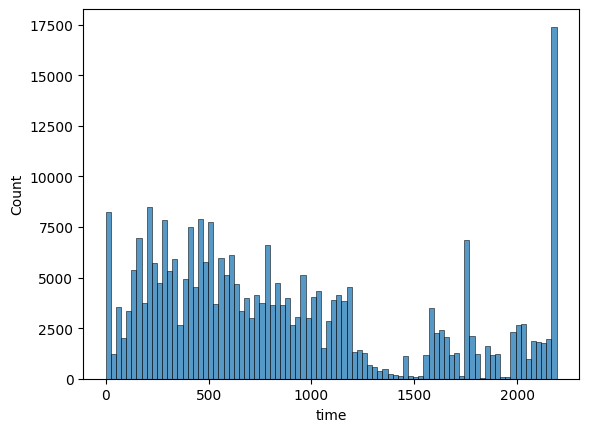

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(result_dataset['time'].dt.days)
plt.show()

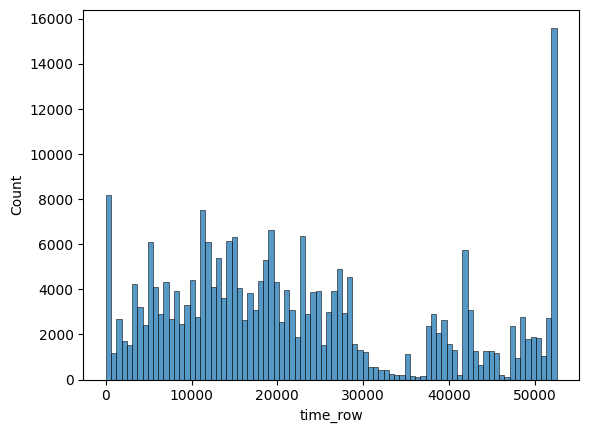

In [ ]:
sns.histplot(result_dataset['time_row'][result_dataset['time_row']>0])
plt.show()

In [ ]:
result_dataset = nn_occ.copy()
result_dataset['time'] = last_occ['date'] - first_occ['date']
result_dataset['time_row'] = last_occ['smart_9_raw'] - first_occ['smart_9_raw']
result_dataset['event'] = last_occ['failure']

In [ ]:
result_dataset.to_csv(r"/content/drive/MyDrive/Survival analysis/datasets_review/backblaze/part_2/first_not_nan_data_dataset.csv")